In [1]:
import numpy as np
from numpy import array
from numpy.random import normal
import matplotlib.pyplot as plt
import os, sys
import struct

import multiprocessing
from multiprocessing import Array
import time

In [2]:
def listdir_nohidden(path):
    return filter( lambda f: not f.startswith('.'), os.listdir(path)) 

def mkdir(path):
    folders = os.path.exists(path)
    if not folders:
        os.mkdir(path)
        print "----Create New Folder----"
    else:
        print "Folder Exist!"


In [3]:
data_path = '/media/jerry/Sexxy/aa-alexnet-tmp/data/'
fig_path_ = '/media/jerry/Sexxy/aa-alexnet-tmp/fig/'

In [4]:
files = list(listdir_nohidden(data_path))
print files

['0.txt', '1.txt', '10.txt', '100.txt', '101.txt', '102.txt', '103.txt', '104.txt', '105.txt', '106.txt', '107.txt', '108.txt', '109.txt', '11.txt', '110.txt', '111.txt', '112.txt', '113.txt', '114.txt', '115.txt', '28.txt', '29.txt', '3.txt', '30.txt', '31.txt', '32.txt', '33.txt', '34.txt', '35.txt', '36.txt', '37.txt', '38.txt', '39.txt', '4.txt', '40.txt', '41.txt', '42.txt', '43.txt', '44.txt', '45.txt', '47.txt', '48.txt', '49.txt', '5.txt', '50.txt', '51.txt', '52.txt', '53.txt', '54.txt', '55.txt', '56.txt', '57.txt', '58.txt', '59.txt', '6.txt', '60.txt', '61.txt', '62.txt', '63.txt', '64.txt', '66.txt', '67.txt', '68.txt', '69.txt', '7.txt', '70.txt', '71.txt', '72.txt', '73.txt', '74.txt', '75.txt', '76.txt', '77.txt', '78.txt', '79.txt', '8.txt', '80.txt', '81.txt', '82.txt', '83.txt', '84.txt', '85.txt', '86.txt', '87.txt', '88.txt', '89.txt', '9.txt', '90.txt', '91.txt', '92.txt', '93.txt', '94.txt', '95.txt', '96.txt', '97.txt', '98.txt', '99.txt', '117.txt', '118.txt', 

In [ ]:
k = int (files[i].split('.', 1)[0])
print k

In [ ]:
ciwi_std_mean = np.zeros(4*256*1728).reshape(4, 256, 1728)

# i= 0 ## kernel-i

for i in range(256):
    print i, 'of 255'
    src_name = data_path + files[i]
    title_name = files[i]
    
    k = int (files[i].split('.', 1)[0])
    
    npy_path = '/media/jerry/Sexxy/aa-alexnet-tmp/npy/' + str(i) + '.npy'
    # print src_name

    a = np.loadtxt(src_name, dtype=np.float32)
    a_1 = a.reshape(8, 1000, 1728)/0.00001
    np.save(npy_path, a_1)


    # j = 0 ## wj

    for j in range(1728):

#         print a.shape ## (8*1000*1728)
        b = a.reshape(8, 1000, 1728)/0.00001

        ci = b[:, :, i].reshape(8 * 1000)
#         print ci.shape

        ci_mean = ci.mean()
        ci_std = ci.std()

        ci_abs_mean = abs(ci).mean()
        ci_abs_std = abs(ci).std()

        ciwi_std_mean[0][k][j] = ci_mean
        ciwi_std_mean[1][k][j] = ci_std
        ciwi_std_mean[2][k][j] = ci_abs_mean
        ciwi_std_mean[3][k][j] = ci_abs_std


#         print ci_mean, ci_std
#         print ci_abs_mean, ci_abs_std

np.save('/media/jerry/Sexxy/aa-alexnet-tmp/ciwi_std_mean.npy', ciwi_std_mean)

In [5]:
m_3d = Array('f', 4* 256* 1728)
def worker(num1, num2, arr_3d):

    for i in range(num1, num2):
        print i, 'of 255'
        src_name = data_path + files[i]
#         title_name = files[i]

        k = int (files[i].split('.', 1)[0])

        npy_path = '/media/jerry/Sexxy/aa-alexnet-tmp/npy/' + str(i) + '.npy'
        # print src_name

        a = np.loadtxt(src_name, dtype=np.float32)
        a_1 = a.reshape(8, 1000, 1728)/0.00001
        np.save(npy_path, a_1)


        # j = 0 ## wj

        for j in range(1728):

    #         print a.shape ## (8*1000*1728)
            b = a.reshape(8, 1000, 1728)/0.00001

            ci = b[:, :, j].reshape(8 * 1000)
    #         print ci.shape

            ci_mean = ci.mean()
            ci_std = ci.std()

            ci_abs_mean = abs(ci).mean()
            ci_abs_std = abs(ci).std()
            
            arr_3d[0*256*1728 + k*1728 + j] = ci_mean
            arr_3d[1*256*1728 + k*1728 + j] = ci_std
            arr_3d[2*256*1728 + k*1728 + j] = ci_abs_mean
            arr_3d[3*256*1728 + k*1728 + j] = ci_abs_std
                        
#             ciwi_std_mean[0][k][j] = ci_mean
#             ciwi_std_mean[1][k][j] = ci_std
#             ciwi_std_mean[2][k][j] = ci_abs_mean
#             ciwi_std_mean[3][k][j] = ci_abs_std
        
        print 'i: ', i, 'Done'

In [6]:
def multi_process():
    p1 = multiprocessing.Process(target = worker, args = (0,64,m_3d))
    p2 = multiprocessing.Process(target = worker, args = (64,128,m_3d))
    p3 = multiprocessing.Process(target = worker, args = (128,192,m_3d))
    p4 = multiprocessing.Process(target = worker, args = (192,256,m_3d))

    p1.start()
    p2.start()
    p3.start()
    p4.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    
    


In [7]:
multi_process()
ciwi_std_mean = np.zeros(4*256*1728)
for i in range(4*256*1728):
    ciwi_std_mean[i] = m_3d[i]

ciwi_std_mean = ciwi_std_mean.reshape(4, 256, 1728)
print 'All Process Done!'

0 of 255
64 of 255
128 of 255
192 of 255
i:  0 Done
1 of 255
i:  192 Done
193 of 255
i:  128 Done
129 of 255
i:  64 Done
65 of 255
i:  1 Done
2 of 255
i:  193 Done
194 of 255
i:  129 Done
130 of 255
i:  65 Done
66 of 255
i:  2 Done
3 of 255
i:  66 Done
67 of 255
i:  130 Done
131 of 255
i:  194 Done
195 of 255
i:  3 Done
4 of 255
i:  195 Done
196 of 255
i:  67 Done
68 of 255
i:  131 Done
132 of 255
i:  4 Done
5 of 255
i:  132 Done
133 of 255
i:  196 Done
197 of 255
i:  68 Done
69 of 255
i:  5 Done
6 of 255
i:  133 Done
134 of 255
i:  197 Done
198 of 255
i:  69 Done
70 of 255
i:  6 Done
7 of 255
i:  134 Done
135 of 255
i:  198 Done
199 of 255
i:  70 Done
71 of 255
i:  7 Done
8 of 255
i:  135 Done
136 of 255
i:  71 Done
72 of 255
i:  199 Done
200 of 255
i:  8 Done
9 of 255
i:  136 Done
137 of 255
i:  200 Done
201 of 255
i:  72 Done
73 of 255
i:  9 Done
10 of 255
i:  201 Done
202 of 255
i:  73 Done
74 of 255
i:  137 Done
138 of 255
i:  10 Done
11 of 255
i:  202 Done
203 of 255
i:  74 Done


In [9]:
ciwi_std_mean.shape


c = ciwi_std_mean.reshape(4, 256*1728)

(4, 256, 1728)

In [20]:
import caffe
import numpy as np
caffe.set_device(0)  
caffe.set_mode_gpu()


model_def = '/home/jerry/caffe-bvlc/examples/bvlc_alexnet/train_val.prototxt'
# model_def = '/home/jerry/caffe-bvlc/examples/bvlc_alexnet/deploy.prototxt'
model_weights = '/home/jerry/caffe-bvlc/examples/bvlc_alexnet/bvlc_alexnet.caffemodel'

net_pre = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

weights5 = net_pre.params['conv5'][0].data
# bias5 = net_pre.params['conv5'][1].data
print weights5.shape
# print bias5.shape

(256, 192, 3, 3)


-2.1996268279736247e-06 5.3849148586623385e-06


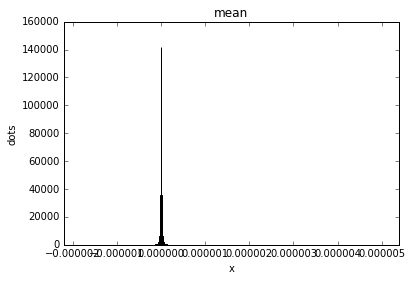

0.0 0.15833452603115994


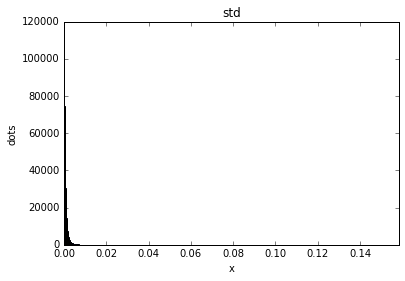

0.0 0.07465022478506489


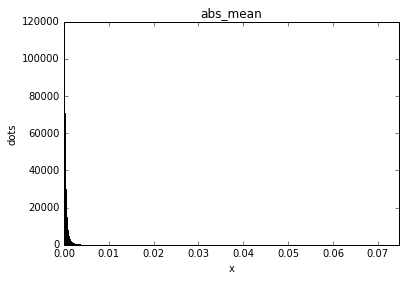

0.0 0.1396322575866753


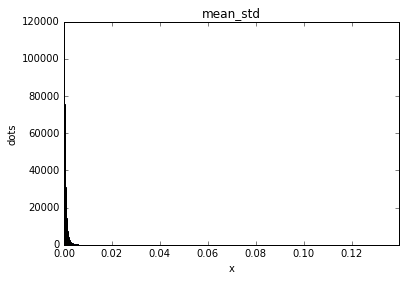

In [32]:
w5 = weights5.reshape(256*192*3*3)
 
title =['mean', 'std', 'abs_mean', 'mean_std']
for i in range(4):
    ci_wi = c[i]*abs(w5)
#     ci_wi = ci_wi[ci_wi != 0]
    print ci_wi.min(), ci_wi.max()
    
    plt.hist(ci_wi, 1000)
    plt.xlabel('x')
    plt.xlim(ci_wi.min(), ci_wi.max())
#     plt.xlim(-0.01, 0.01)
    plt.ylabel('dots')
    plt.title(title[i])
    plt.show()
        

-0.17743862 0.3382605


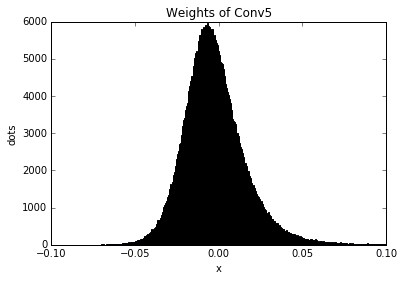

In [46]:
print w5.min(), w5.max()

plt.hist(w5, 1000)
plt.xlabel('x')
plt.xlim(-0.1, 0.1)
#     plt.xlim(-0.01, 0.01)
plt.ylabel('dots')
plt.title('Weights of Conv5')
plt.show()

-2.1996268279736247e-06 5.3849148586623385e-06


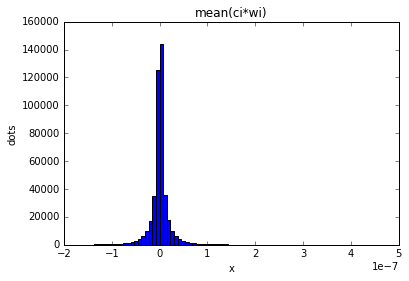

In [41]:
i = 0
ci_wi = c[i]*w5
#     ci_wi = ci_wi[ci_wi != 0]
print ci_wi.min(), ci_wi.max()

plt.hist(ci_wi, 1000)
plt.xlabel('x')
plt.xlim(-2e-7, 5e-07)
#     plt.xlim(-0.01, 0.01)
plt.ylabel('dots')
plt.title('mean(ci*wi)')
plt.show()


0.0 0.15833452603115994


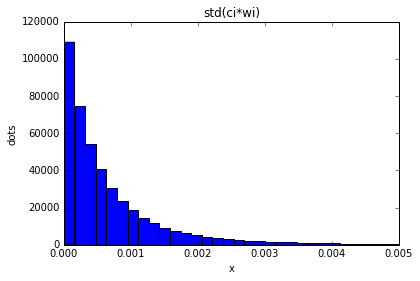

In [42]:
i = 1
ci_wi = c[i]*abs(w5)
#     ci_wi = ci_wi[ci_wi != 0]
print ci_wi.min(), ci_wi.max()

plt.hist(ci_wi, 1000)
plt.xlabel('x')
plt.xlim(0, 0.005)
#     plt.xlim(-0.01, 0.01)
plt.ylabel('dots')
plt.title('std(ci*wi)')
plt.show()

In [ ]:
a1 = a[a!=0]/0.00001
a1.shape

In [ ]:
plt.hist(a1,1000)
plt.xlabel('lenth')
plt.xlim(-0.5,0.5)
plt.ylabel('dots')
plt.title(title_name)
plt.show()

In [ ]:
# print a.shape ## (13824000,)
b = a.reshape(8,1000,1728)
b = b/0.00001
# print b.shape






fig_path1 = fig_path_ + str(i) + '/'
print fig_path1
mkdir(fig_path1)

for j in range(1728):
    fig_path = fig_path1 + str(i) + '-' + str(j) +'.png'
#         print fig_path

    c = b[:,:,j]
    c.shape

    d = c.reshape(8*1000)
    d.sort()
    d1 = d[0]
    d2 = d[8*1000 -1]
    # print d[0]
    # print d[8*1000 -1]

    e = d[d != 0]
    # print e
    # print e.shape

    plt.hist(e,100)
    plt.xlabel('lenth')
    plt.xlim(d1,d2)
    plt.ylabel('dots')
    plt.title(title_name)


    plt.savefig(fig_path)
    plt.close()

In [ ]:
# i = 0

for i in range(256):
    
    src_name = data_path + files[i]
    title_name = files[i]
    # print src_name

    a = np.loadtxt(src_name, dtype=np.float32)

    # print a.shape ## (13824000,)
    b = a.reshape(8,1000,1728)
    b = b/0.00001
    # print b.shape






    fig_path1 = fig_path_ + str(i) + '/'
    print fig_path1
    mkdir(fig_path1)

    for j in range(1728):
        fig_path = fig_path1 + str(i) + '-' + str(j) +'.png'
#         print fig_path

        c = b[:,:,j]
        c.shape

        d = c.reshape(8*1000)
        d.sort()
        d1 = d[0]
        d2 = d[8*1000 -1]
        # print d[0]
        # print d[8*1000 -1]

        e = d[d != 0]
        # print e
        # print e.shape

        plt.hist(e,100)
        plt.xlabel('lenth')
        plt.xlim(d1,d2)
        plt.ylabel('dots')
        plt.title(title_name)


        plt.savefig(fig_path)
        plt.close()
    #     plt.show()

In [ ]:
# plt.savefig(fig_path)

In [ ]:
## Statis aa-alexnet-certain-class/285

a_285_path_ = '/media/jerry/Sexxy/aa-alexnet-certain-class/285/'

a_285_files = list(listdir_nohidden(a_285_path_))
len(a_285_files)

In [ ]:
# i = 1
b_285 = np.zeros(250 * 1000 * 256).reshape(250, 1000, 256)
for i in range(250):
    a_285_path =a_285_path_ + a_285_files[i]
    print a_285_path

    a_285 = np.loadtxt(a_285_path, dtype=np.float32)
    # print a_285.shape


    b_285[i,:,:] = a_285.reshape(1000, 256)
# print b_285[i]
np.save('/media/jerry/Sexxy/aa-alexnet-certain-class/285.npy', b_285)

In [ ]:
b_285.shape
c = b_285[:,285,2]
print c.shape
# print c
d = b_285[:,285,0].reshape(250)

In [ ]:
# print d

for i in range(256):
    fig_path = '/media/jerry/Sexxy/aa-alexnet-certain-class/285_fig/' + str(i) + '.png'
    fit_title = 'kernel' + str(i)
    d = b_285[:,285,i].reshape(250)
    plt.hist(d,25)
    plt.xlabel('lenth')
    plt.xlim(-0.01,0.01)
    plt.ylabel('dots')
    plt.title(fit_title)
    plt.savefig(fig_path)
    plt.close()
#     plt.show()

In [ ]:
plt.hist(d,25)
plt.xlabel('lenth')
plt.xlim(-0.01,0.01)
plt.ylabel('dots')
plt.title(title_name)
plt.show()